# Task 2.1: Least squares regression for missing value prediction

# Task 2.3: Bayesian regression for missing value prediction

In [2]:
import numpy as np
import matplotlib.pyplot as plt

## Data

In [3]:
dt = np.dtype([('w', np.float), ('h', np.float), ('g', np.str_, 1)])
data = np.loadtxt('whData.dat', dtype=dt, comments='#', delimiter=None)

In [4]:
x = data['h'] # height
y = data['w'] # weight

In [5]:
data_wo = data[data['w'] > -1] # data without outliers
x_wo = data_wo['h'] # height without outliers
y_wo = data_wo['w'] # weight without outliers
outliers = data[data['w'] == -1]

## Functions

In [6]:
# Returns y = w0 + w1*x + w2*x^2 + w3*x^3 + w4*x^4 + ... + wd*x^d
# Variables:-
#   w: array of weights
#   x: value
#   d: degree of polynomial
def curve(w, x, d):
    y = 0
    for i in range(d+1):
        y += w[i] * x**i
    return y

In [7]:
# Returns predictions for a dataset using function curve
# Variables:-
#   xs: dataset
#   w: array of weights
#   d: degree of polynomial
def predict(xs, w, d):
    y = []
    for x in xs:
        y.append(curve(w, x, d))    
    y = np.array(y)
    
    return y

## Detecting weights

###  Least Square Regression

In [8]:
# Calculates and returns weights for polynomial using least square regression
# Variables:-
#   x: data
#   y: label
#   d: degree of polynomial
def get_w_mle(x, y, d):
    X = np.ones(x.shape)
    for i in range(d):
        X = np.vstack((X, x**(i+1)))
        
    sigmasq = np.var(y)
    w_mle = np.linalg.lstsq(X.T, y_wo)[0]
    
    return w_mle

#### Plot

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


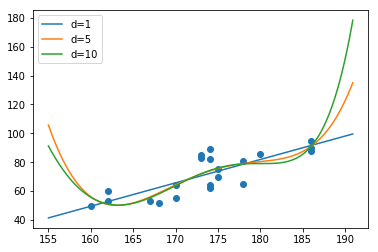

In [9]:
plt.scatter(x_wo, y_wo)
x_plot = np.arange(np.amin(x_wo)-5,np.amax(x_wo)+5,0.1)

# Polynomial Regression. d = 1
w_mle_1 = get_w_mle(x_wo, y_wo, 1)
y_mle_1 = predict(x_plot, w_mle_1, 1)

# Polynomial Regression. d = 5
w_mle_5 = get_w_mle(x_wo, y_wo, 5)
y_mle_5 = predict(x_plot, w_mle_5, 5)

# Polynomial Regression. d = 10
w_mle_10 = get_w_mle(x_wo, y_wo, 10)
y_mle_10 = predict(x_plot, w_mle_10, 10)

plt.plot(x_plot, y_mle_1)
plt.plot(x_plot, y_mle_5)
plt.plot(x_plot, y_mle_10)
plt.gca().legend(('d=1','d=5','d=10'))

#### Predictions

In [10]:
print("d = 1: ", predict(outliers['h'], w_mle_1, 1))
print("d = 5: ", predict(outliers['h'], w_mle_5, 5))
print("d = 10: ", predict(outliers['h'], w_mle_10, 10))

d = 1:  [62.50890849 68.98114513 60.89084933]
d = 5:  [58.72437298 69.63454013 56.0735325 ]
d = 10:  [58.0452381  69.48472924 55.46584172]


### Bayesian Regression

In [11]:
# Calculates and returns weights for polynomial using bayesian regression
# Variables:-
#   x: data
#   y: label
#   d: degree of polynomial
def get_w_map(x, y, d, sigma0sq):
    I = np.identity(d+1)
    X = np.ones(x.shape)
    for i in range(d):
        X = np.vstack((X, x**(i+1)))
    
    sigmasq = np.var(y)
    w_map = np.dot(np.dot(np.linalg.inv(np.dot(X,X.T) + sigmasq/sigma0sq * I),X),y)
    
    return w_map

#### Plot

C:\tools\Anaconda3\lib\site-packages\ipykernel_launcher.py:12: FutureWarning: `rcond` parameter will change to the default of machine precision times ``max(M, N)`` where M and N are the input matrix dimensions.
To use the future default and silence this warning we advise to pass `rcond=None`, to keep using the old, explicitly pass `rcond=-1`.
  if sys.path[0] == '':


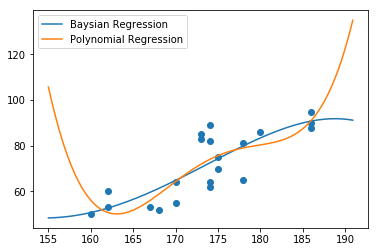

In [12]:
sigma0sq = 3.0
plt.scatter(x_wo, y_wo)
x_plot = np.arange(np.amin(x_wo)-5,np.amax(x_wo)+5,0.1)

# Bayesian Regression. d = 5
w_map = get_w_map(x_wo, y_wo, 5, sigma0sq)
y_map = predict(x_plot, w_map, 5)

# Polynomial Regression. d = 5
w_mle = get_w_mle(x_wo, y_wo, 5)
y_mle = predict(x_plot, w_mle, 5)

plt.plot(x_plot, y_map)
plt.plot(x_plot, y_mle)
plt.gca().legend(('Baysian Regression','Polynomial Regression'))

#### Predictions

In [13]:
print("d = 5: ", predict(outliers['h'], w_map, 5))

d = 5:  [61.29383185 68.5821912  59.62399567]
